# MoDISco on Fibroblast model

Running MoDISco on fibroblast state to see negative motifs.

In [1]:
import modisco
import h5py
import intervaltree
import h5py
from collections import defaultdict, OrderedDict, Counter

In [2]:
!pip freeze | grep modisco

modisco==0.5.14.0


In [3]:
HDF5_PATH = "/users/surag/oak/projects/scATAC-reprog/bpnet/models/20210414_gc_neg_filt256_in2346_out2000/cluster_idx5/interpretation/2021-04-15_23_54_58/counts_scores.h5"
REG_PATH = "/users/surag/oak/projects/scATAC-reprog/bpnet/models/20210414_gc_neg_filt256_in2346_out2000/cluster_idx5/interpretation/2021-04-15_23_54_58/peaks_valid_scores.bed"

In [4]:
# will crop to this region around center (summit of peak)
CROP = 500

In [5]:
scores = h5py.File(HDF5_PATH, 'r')

In [6]:
# scores.close()

In [7]:
with open(REG_PATH) as f:
    scores_regions = [x.strip().split('\t') for x in f]

# importance scores are computed centered at summit (2nd col + 10th col)
scores_regions = [(x[0], int(x[9])+int(x[1])-CROP//2, int(x[9])+int(x[1])+CROP//2) for x in scores_regions]

In [8]:
PEAK_SET_BASE = "../20200307_fine_clustering/beds/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/idx{}.bed"
# PEAK_SET = "./peak_sets/open_stay.200.bed"

In [25]:
peak_set_intervals = defaultdict(intervaltree.IntervalTree)

PEAK_SET_SELECT = [4]
for peak_set_idx in PEAK_SET_SELECT:
    with open(PEAK_SET_BASE.format(peak_set_idx)) as f:
        for i,x in enumerate(f):
            x = x.strip().split('\t')
            peak_set_intervals[x[0]][int(x[1]):int(x[2])] = peak_set_idx

In [26]:
# find scored regions intersecting with peak set

intersecting_idx = [i for i,x in enumerate(scores_regions) if peak_set_intervals[x[0]][x[1]:x[2]]]

print(sum([len(peak_set_intervals[x]) for x in peak_set_intervals]))
print(len(intersecting_idx))
print(len(scores_regions))

21589
21902
163955


In [27]:
intersecting_peak_set = [peak_set_intervals[scores_regions[i][0]][scores_regions[i][1]:scores_regions[i][2]] for i in intersecting_idx]
intersecting_peak_set = [list(x)[0].data for x in intersecting_peak_set]

In [28]:
Counter(intersecting_peak_set)

Counter({4: 21902})

In [29]:
def revcomp(x):
    # Assuming ACGT
    return x[::-1][:,::-1]

In [30]:
shap_scores_seq = []
proj_shap_scores_seq = []
one_hot_seqs = []

center = int(scores['shap']['seq'].shape[-1]/2)
start = center - CROP//2
end = center + CROP//2

for i in scores['shap']['seq'][intersecting_idx]:
    shap_scores_seq.append(i[:,start:end].transpose())

for i in scores['projected_shap']['seq'][intersecting_idx]:
    proj_shap_scores_seq.append(i[:,start:end].transpose())

for i in scores['raw']['seq'][intersecting_idx]:
    one_hot_seqs.append(i[:,start:end].transpose())

tasks = ['task0']
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

onehot_data = one_hot_seqs
task_to_scores['task0']  = proj_shap_scores_seq
task_to_hyp_scores['task0']  = shap_scores_seq

In [31]:
import modisco

# from modisco.visualization import viz_sequence

MEMORY 33.237737472
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= 0.0022173146279585187
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.34369118287669603 occurring at 1.905140383229309e-07 implying a frac_neg of 0.5236729629553721
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.3512783352638889 occurring at -8.424667630180238e-08 implying a frac_neg of 0.5414931462274857
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.29802704315989104  and  0.5248267578350351 with frac passing 0.049357
Final raw thresholds are -0.29802704315989104  and  0.5248267578350351
Final transformed thresholds are -0.9074959880822359  and  0.9519274196472626


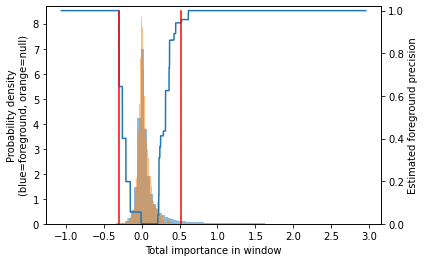

Got 34528 coords
After resolving overlaps, got 34528 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9073959880822359
MEMORY 33.269456896
34528 identified in total
min_metacluster_size_frac * len(seqlets) = 345 is more than min_metacluster_size=100.
Using it as a new min_metacluster_size
2 activity patterns with support >= 345 out of 2 possible patterns
Metacluster sizes:  [33139, 1389]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 33.270124544
On metacluster 1
Metacluster size 1389
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 1389
(Round 1) Computing coarse affmat
MEMORY 33.270525952
Beginning embedding computation
MEMORY 33.270525952
Computing embeddings
Finished embedding computation in 3.14 s
MEMORY 34.739470336
Starting affinity matrix computations
MEMORY 34.739470336
Batching in slices of size 1389


100%|██████████| 1/1 [00:04<00:00,  4.09s/it]

Finished affinity matrix computations in 5.25 s
MEMORY 34.739777536


(Round 1) Computed coarse affmat
MEMORY 33.28329728
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 33.28329728
Launching nearest neighbors affmat calculation job
MEMORY 33.28329728
Parallel runs completed
MEMORY 33.28765952
Job completed in: 11.77 s
MEMORY 33.28765952
Launching nearest neighbors affmat calculation job
MEMORY 33.28765952
Parallel runs completed
MEMORY 33.29052672
Job completed in: 12.04 s
MEMORY 33.29052672
(Round 1) Computed affinity matrix on nearest neighbors in 24.72 s
MEMORY 33.290596352
Filtered down to 1131 of 1389
(Round 1) Retained 1131 rows out of 1389 after filtering
MEMORY 33.290596352
(Round 1) Computing density adapted affmat
MEMORY 33.319763968
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 33.30740224
Beginning preprocessing + Leiden
Affmat shape: 1131


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   39.7s


Quality: 0.1844207598661816
Got 4 clusters after round 1
Counts:
{2: 267, 0: 374, 1: 333, 3: 157}
MEMORY 33.307803648
(Round 1) Aggregating seqlets in each cluster
MEMORY 33.307803648
Aggregating for cluster 0 with 374 seqlets
MEMORY 33.307803648


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   45.9s finished


Skipped 3 seqlets that went over sequence edge during flank expansion
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 369
Skipped 3 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 333 seqlets
MEMORY 33.310896128
Skipped 1 seqlets that went over sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 332
Skipped 1 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 267 seqlets
MEMORY 33.31145728
Skipped 1 seqlets that went over sequence edge during flank expansion
Skipped 4 due to duplicates
Trimming eliminated 0 seqlets out of 262
Aggregating for cluster 3 with 157 seqlets
MEMORY 33.311547392
Skipped 3 seqlets that went over sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 154
Skipped 1 seqlets that went over the sequence edge during flank expansion
Dropping cluster 3 with 153 seqlets due to sign disagreement
(Round 2) num seqlets: 959
(R

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

Finished affinity matrix computations in 2.6 s
MEMORY 34.317590528


(Round 2) Computed coarse affmat
MEMORY 33.311997952
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 33.311997952
Launching nearest neighbors affmat calculation job
MEMORY 33.311997952
Parallel runs completed
MEMORY 33.312075776
Job completed in: 8.05 s
MEMORY 33.312075776
Launching nearest neighbors affmat calculation job
MEMORY 33.312075776
Parallel runs completed
MEMORY 33.317011456
Job completed in: 8.46 s
MEMORY 33.317011456
(Round 2) Computed affinity matrix on nearest neighbors in 17.36 s
MEMORY 33.255899136
Not applying filtering for rounds above first round
MEMORY 33.255899136
(Round 2) Computing density adapted affmat
MEMORY 33.286459392
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 33.262743552
Beginning preprocessing + Leiden
Affmat shape: 959


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.4s


Quality: 0.13096723104185146
Got 3 clusters after round 2
Counts:
{0: 386, 2: 229, 1: 344}
MEMORY 33.263570944
(Round 2) Aggregating seqlets in each cluster
MEMORY 33.263570944
Aggregating for cluster 0 with 386 seqlets
MEMORY 33.263570944


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   47.5s finished


Skipped 1 seqlets that went over sequence edge during flank expansion
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 384
Skipped 2 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 344 seqlets
MEMORY 33.263570944
Trimming eliminated 0 seqlets out of 344
Aggregating for cluster 2 with 229 seqlets
MEMORY 33.263570944
Trimming eliminated 0 seqlets out of 229
Got 3 clusters
Splitting into subclusters...
MEMORY 33.263570944
Inspecting pattern 0 for spurious merging


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 281 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 382 out of 382 | elapsed:    0.3s finished


[t-SNE] Computed conditional probabilities for sample 382 / 382
[t-SNE] Mean sigma: 0.472213
Beginning preprocessing + Leiden
Affmat shape: 382


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.5s


Quality: 0.6063199969944439
Quality: 0.6063371025263159
Got subclusters: Counter({0: 96, 1: 94, 2: 49, 3: 36, 4: 32, 5: 26, 6: 22, 7: 15, 8: 12})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   18.3s finished


Numbers for each pattern pre-subsample: [96, 94, 49, 36, 32, 26, 22, 15, 12]
Numbers after subsampling: [96, 94, 49, 36, 32, 26, 22, 15, 12]
Computing sims for pattern 0
Computed sims for pattern 0 in 1.306946039199829 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.538050651550293 s
Computing sims for pattern 2
Computed sims for pattern 2 in 1.2699589729309082 s
Computing sims for pattern 3
Computed sims for pattern 3 in 1.1909003257751465 s
Computing sims for pattern 4
Computed sims for pattern 4 in 1.0726234912872314 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.8427064418792725 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.8137788772583008 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.6979215145111084 s
Computing sims for pattern 8
Computed sims for pattern 8 in 0.5949122905731201 s
Cluster sizes
[96 94 49 36 32 26 22 15 12]
Cross-contamination matrix:
[[1.   0.17 0.23 0.16 0.34 0.21 0.33 0.22 0.16]
 [0.02 1.   0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 238 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 344 out of 344 | elapsed:    0.3s finished


[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 0.379488
Beginning preprocessing + Leiden
Affmat shape: 344


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.7s


Quality: 0.3872571167870149
Quality: 0.3889053103282873
Quality: 0.39002874701499335
Quality: 0.39110075634923525
Quality: 0.39119871242392945
Quality: 0.3912821592925853
Got subclusters: Counter({0: 127, 1: 91, 2: 60, 3: 42, 4: 11, 5: 6, 6: 5, 7: 2})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   19.8s finished


Numbers for each pattern pre-subsample: [127, 91, 60, 42, 11, 6, 5, 2]
Numbers after subsampling: [127, 91, 60, 42, 11, 6, 5, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 1.6644091606140137 s
Computing sims for pattern 1
Computed sims for pattern 1 in 1.3495888710021973 s
Computing sims for pattern 2
Computed sims for pattern 2 in 1.1238558292388916 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.9129395484924316 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.49211549758911133 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.35309457778930664 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.3195333480834961 s
Computing sims for pattern 7
Computed sims for pattern 7 in 0.20606303215026855 s
Cluster sizes
[127  91  60  42  11   6   5   2]
Cross-contamination matrix:
[[1.   0.35 0.86 0.68 0.42 0.46 0.37 0.43]
 [0.18 1.   0.16 0.38 0.47 0.06 0.07 0.21]
 [0.88 0.33 1.   0.6  0.4  0.38 0.33 0.62]
 [0.88 0.78 0.8

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 190 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 229 out of 229 | elapsed:    0.3s finished


[t-SNE] Computed conditional probabilities for sample 229 / 229
[t-SNE] Mean sigma: 0.333586
Beginning preprocessing + Leiden
Affmat shape: 229


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.9s


Quality: 0.3733074358990664
Quality: 0.37358080566477186
Got subclusters: Counter({0: 88, 1: 55, 2: 47, 3: 39})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   17.6s finished


Numbers for each pattern pre-subsample: [88, 55, 47, 39]
Numbers after subsampling: [88, 55, 47, 39]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.5791575908660889 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.5954420566558838 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.46065831184387207 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.5166044235229492 s
Cluster sizes
[88 55 47 39]
Cross-contamination matrix:
[[1.   0.05 0.36 0.52]
 [0.51 1.   0.6  0.65]
 [0.96 0.08 1.   0.84]
 [1.   0.09 0.78 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.29 0.93 0.98]
 [0.29 1.   0.3  0.31]
 [0.93 0.3  1.   0.95]
 [0.98 0.31 0.95 1.  ]]
Collapsing 0 & 3 with crosscontam 0.5206811740256989 and sim 0.979753943141447
Collapsing 2 & 3 with crosscontam 0.7787465750452027 and sim 0.948433053329581
Collapsing 0 & 2 with crosscontam 0.36433222900714535 and sim 0.9344149622571953
Trimming eliminated 0 seqlets out of 127
Trimming eliminated 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    0.3s finished
/users/surag/anaconda3/envs/mtbatchgen/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning
/users/surag/anaconda3/envs/mtbatchgen/lib/python3.7/site-packages/sklearn/neighbors/_base.py:176: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 385 samples in 0.005s...
[t-SNE] Computed neighbors for 385 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 385 / 385
[t-SNE] Mean sigma: 0.263042
[t-SNE] Computed conditional probabilities in 0.037s
[t-SNE] Iteration 50: error = 68.6126175, gradient norm = 0.4603319 (50 iterations in 0.098s)
[t-SNE] Iteration 100: error = 72.7569809, gradient norm = 0.4475103 (50 iterations in 0.092s)
[t-SNE] Iteration 150: error = 72.2598267, gradient norm = 0.4503130 (50 iterations in 0.088s)
[t-SNE] Iteration 200: error = 72.5828323, gradient norm = 0.4292153 (50 iterations in 0.093s)
[t-SNE] Iteration 250: error = 74.4256973, gradient norm = 0.4212473 (50 iterations in 0.095s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.425697
[t-SNE] Iteration 300: error = 1.3929605, gradient norm = 0.0042122 (50 iterations in 0.093s)
[t-SNE] Iteration 350: error = 1.2270647, gradient norm = 0.0032403 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.1s


Quality: 0.30973798156367005


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   21.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Got subclusters: Counter({0: 141, 1: 85, 2: 83, 3: 68, 4: 5, 5: 3})
On pattern 1


[Parallel(n_jobs=4)]: Done 175 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 238 out of 238 | elapsed:    0.3s finished


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 238 samples in 0.005s...
[t-SNE] Computed neighbors for 238 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 238 / 238
[t-SNE] Mean sigma: 0.346063
[t-SNE] Computed conditional probabilities in 0.022s
[t-SNE] Iteration 50: error = 60.4592323, gradient norm = 0.5053388 (50 iterations in 0.071s)
[t-SNE] Iteration 100: error = 64.6394272, gradient norm = 0.4181290 (50 iterations in 0.068s)
[t-SNE] Iteration 150: error = 64.4314804, gradient norm = 0.4774637 (50 iterations in 0.066s)
[t-SNE] Iteration 200: error = 61.1668510, gradient norm = 0.5206727 (50 iterations in 0.067s)
[t-SNE] Iteration 250: error = 64.5020447, gradient norm = 0.4744309 (50 iterations in 0.064s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.502045
[t-SNE] Iteration 300: error = 1.0653882, gradient norm = 0.0052529 (50 iterations in 0.066s)
[t-SNE] Iteration 350: error = 0.7003757, gradient norm = 0.0067634 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.6s


Quality: 0.28940669183418594
Quality: 0.2959351136115758
Quality: 0.2963170081186784
Quality: 0.2963981741470011
Quality: 0.29646266896537393


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   17.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 127 out of 127 | elapsed:    0.1s finished


Got subclusters: Counter({0: 62, 1: 59, 2: 53, 3: 24, 4: 19, 5: 9, 6: 4, 7: 3, 8: 3, 9: 2})
On pattern 2
[t-SNE] Computing 126 nearest neighbors...
[t-SNE] Indexed 127 samples in 0.003s...
[t-SNE] Computed neighbors for 127 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 127 / 127
[t-SNE] Mean sigma: 0.419364
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 60.7655067, gradient norm = 0.5070260 (50 iterations in 0.052s)
[t-SNE] Iteration 100: error = 62.4114609, gradient norm = 0.4955190 (50 iterations in 0.042s)
[t-SNE] Iteration 150: error = 57.8243332, gradient norm = 0.4690241 (50 iterations in 0.045s)
[t-SNE] Iteration 200: error = 62.7956581, gradient norm = 0.4290401 (50 iterations in 0.043s)
[t-SNE] Iteration 250: error = 60.2306519, gradient norm = 0.4623403 (50 iterations in 0.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.230652
[t-SNE] Iteration 300: error = 0.9189149, gradient norm =

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.5s


Quality: 0.17110678598421378
Quality: 0.1716857686448685
Got subclusters: Counter({0: 35, 1: 27, 2: 25, 3: 20, 4: 20})
On metacluster 0
Metacluster size 33139 limited to 30000
Relevant tasks:  ('task0',)
Relevant signs:  (1,)


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   15.9s finished


TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 30000
(Round 1) Computing coarse affmat
MEMORY 33.25114368
Beginning embedding computation
MEMORY 33.25114368
Computing embeddings
Finished embedding computation in 41.58 s
MEMORY 64.6750208
Starting affinity matrix computations
MEMORY 64.6750208
Batching in slices of size 2236


100%|██████████| 14/14 [33:33<00:00, 143.81s/it]

Finished affinity matrix computations in 2038.69 s
MEMORY 64.67495936


(Round 1) Computed coarse affmat
MEMORY 33.217671168
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 33.217671168
Launching nearest neighbors affmat calculation job
MEMORY 33.3677568
Parallel runs completed
MEMORY 33.458651136
Job completed in: 218.96 s
MEMORY 33.458651136
Launching nearest neighbors affmat calculation job
MEMORY 33.458860032
Parallel runs completed
MEMORY 33.66465536
Job completed in: 224.04 s
MEMORY 33.66465536
(Round 1) Computed affinity matrix on nearest neighbors in 449.65 s
MEMORY 33.510969344
Filtered down to 10424 of 30000
(Round 1) Retained 10424 rows out of 30000 after filtering
MEMORY 33.511124992
(Round 1) Computing density adapted affmat
MEMORY 33.677955072
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 33.614585856
Beginning preprocessing + Leiden
Affmat shape: 10424


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min


Quality: 0.6483814880672262
Quality: 0.6486036535646538


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  5.2min finished


Got 13 clusters after round 1
Counts:
{2: 1097, 11: 394, 5: 784, 8: 651, 3: 968, 10: 416, 4: 800, 0: 1801, 9: 443, 6: 753, 12: 387, 1: 1230, 7: 700}
MEMORY 33.615245312
(Round 1) Aggregating seqlets in each cluster
MEMORY 33.615245312
Aggregating for cluster 0 with 1801 seqlets
MEMORY 33.615245312
Skipped 51 seqlets that went over sequence edge during flank expansion
Skipped 25 due to duplicates
Trimming eliminated 0 seqlets out of 1725
Skipped 10 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 1 with 1230 seqlets
MEMORY 33.629671424
Skipped 29 seqlets that went over sequence edge during flank expansion
Skipped 20 due to duplicates
Trimming eliminated 0 seqlets out of 1181
Skipped 6 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 2 with 1097 seqlets
MEMORY 33.629765632
Skipped 1 seqlets that went over the sequence edge during flank expansion
Skipped 28 seqlets that went over sequence edge during flank expan

100%|██████████| 2/2 [02:15<00:00, 67.69s/it]

Finished affinity matrix computations in 143.69 s
MEMORY 43.9642112


(Round 2) Computed coarse affmat
MEMORY 33.640972288
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 33.640972288
Launching nearest neighbors affmat calculation job
MEMORY 33.641517056
Parallel runs completed
MEMORY 33.538891776
Job completed in: 75.48 s
MEMORY 33.538891776
Launching nearest neighbors affmat calculation job
MEMORY 33.539080192
Parallel runs completed
MEMORY 33.560870912
Job completed in: 75.87 s
MEMORY 33.4997504
(Round 2) Computed affinity matrix on nearest neighbors in 153.95 s
MEMORY 33.498681344
Not applying filtering for rounds above first round
MEMORY 33.498681344
(Round 2) Computing density adapted affmat
MEMORY 33.816485888
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators


In [ ]:
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)

tfmodisco_patterns_factory = modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
    trim_to_window_size=20, initial_flank_to_add=5, kmer_len=8, num_gaps=1,
    num_mismatches=0, final_min_cluster_size=100)

tfmodisco_workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    #Slight modifications from the default settings
    sliding_window_size=20, flank_size=5, target_seqlet_fdr=0.05,
    max_seqlets_per_metacluster=30000,
    seqlets_to_patterns_factory=tfmodisco_patterns_factory)

tfmodisco_results = tfmodisco_workflow(task_names=["task0"],
                                       contrib_scores=task_to_scores,
                                       hypothetical_contribs=task_to_hyp_scores,
                                       one_hot=onehot_data,
                                       null_per_pos_scores = null_per_pos_scores)

In [36]:
tfmodisco_results

In [38]:
import h5py
import modisco.util

![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("./modisco_runs/results_cluster_idx5_gc_neg_peak_set_4/modisco.hdf5", "w")
tfmodisco_results.save_hdf5(grp)
grp.close()

/bin/sh: 1: [[: not found


Metaclusters heatmap


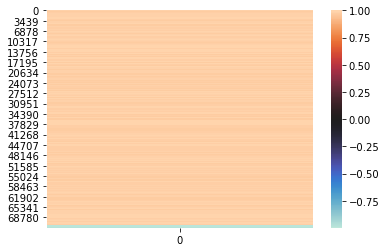

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 211
Task 0 hypothetical scores:


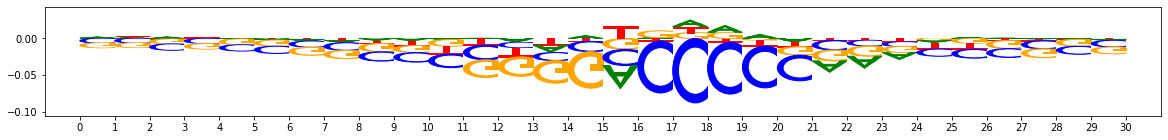

Task 0 actual importance scores:


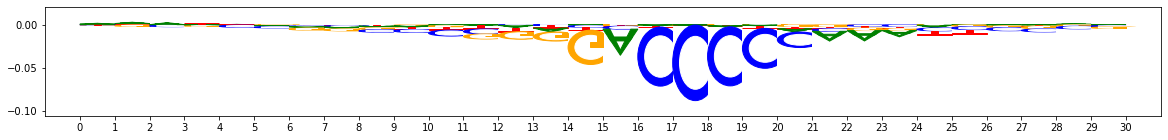

onehot, fwd and rev:


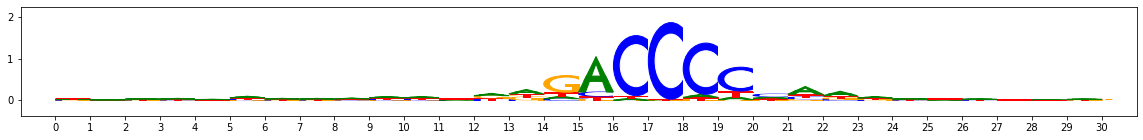

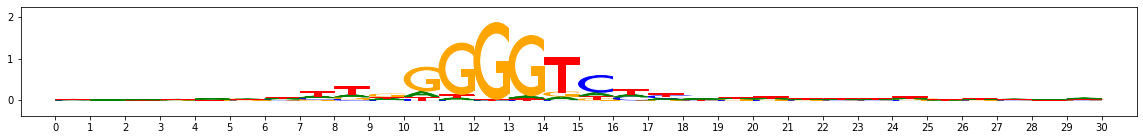

metacluster_1 pattern_1
total seqlets: 205
Task 0 hypothetical scores:


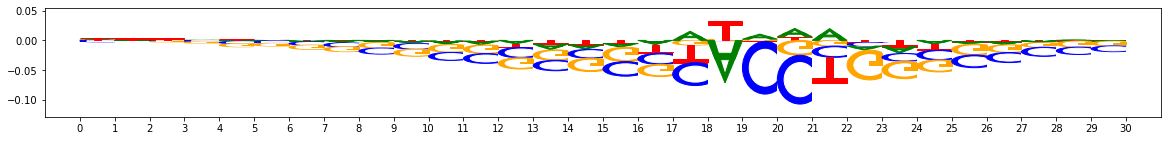

Task 0 actual importance scores:


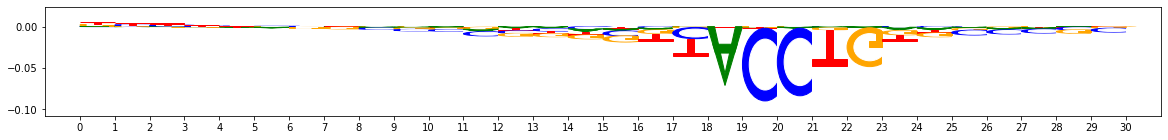

onehot, fwd and rev:


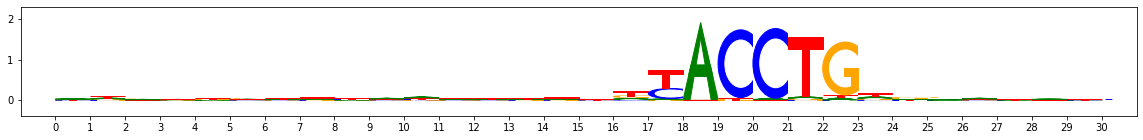

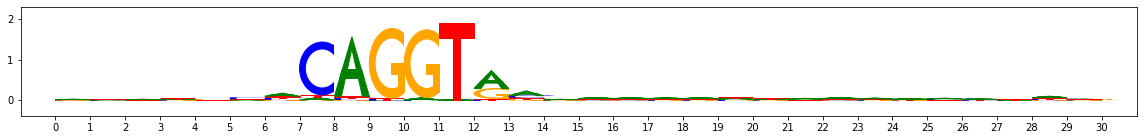

metacluster_1 pattern_2
total seqlets: 126
Task 0 hypothetical scores:


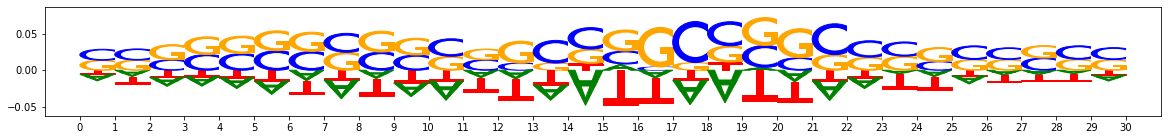

Task 0 actual importance scores:


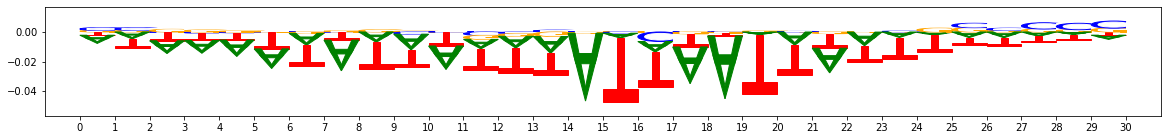

onehot, fwd and rev:


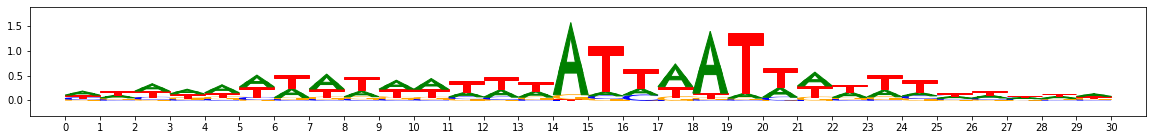

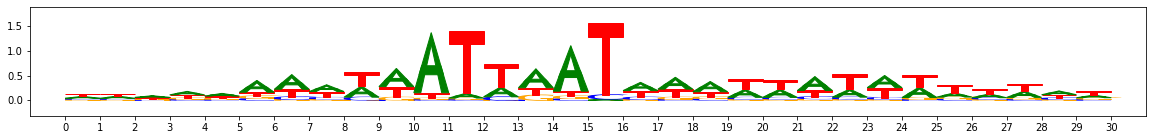

In [40]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("./modisco_runs/results_cluster_idx4_gc_neg_peak_set_8_10_11_13//modisco.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names[1:]:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        #Plot the subclustering too, if available
#         if ("subclusters" in pattern):
#             print("PLOTTING SUBCLUSTERS")
#             subclusters = np.array(pattern["subclusters"])
#             twod_embedding = np.array(pattern["twod_embedding"])
#             plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
#             plt.show()
#             for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
#                 subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
#                 print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
#                 subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
#                 plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
#                 plt.show()
#                 viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
#                 viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["fwd"]),
#                                                         background=background)) 
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["rev"]),
#                                                         background=background))
#         break
hdf5_results.close()

In [454]:
# hdf5_results = h5py.File("results_cluster_idx14_peak_set_idx8.hdf5","r")
hdf5_results = h5py.File("./modisco_runs/results_cluster_idx4_gc_neg_peak_set_8_10_11_13/modisco.hdf5","r")
# hdf5_results = h5py.File("/users/surag/modisco_results_allChroms_counts.hdf5","r")

In [476]:
PAT = "pattern_0"
pat = hdf5_results['metacluster_idx_to_submetacluster_results']['metacluster_0']['seqlets_to_patterns_result']['patterns'][PAT]

In [477]:
idxs = pat['seqlets_and_alnmts']['seqlets']
idxs = [int(x.decode().split(',')[0].split(":")[1]) for x in idxs]
seqlet_to_peak_idxs = [intersecting_peak_set[x] for x in idxs]

In [478]:
emb = pat["twod_embedding"]
sc = pat["subclusters"]

No handles with labels found to put in legend.


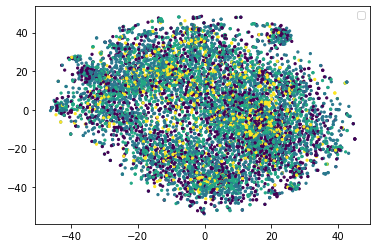

In [479]:
plt.scatter(emb[:,0], emb[:,1], c=np.array(seqlet_to_peak_idxs), s=5)
plt.legend()

In [459]:
FWD_START = 8
FWD_END = 23

# OS: 8-23
# K: 15-25
# S: 13-26
# AP1: 16-25

chr13 32688126 32688156


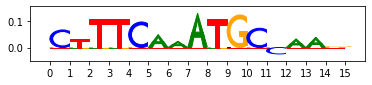

chr18 13022072 13022102


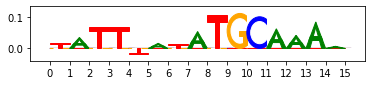

chr12 58723357 58723387


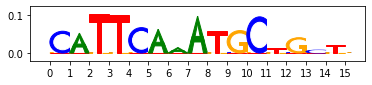

chr11 125527010 125527040


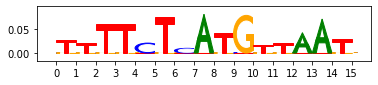

chr12 83716712 83716742


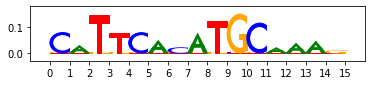

chr13 74729749 74729779


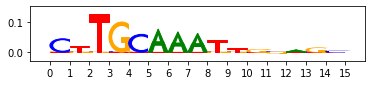

chr15 73058894 73058924


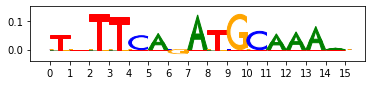

chr16 59771108 59771138


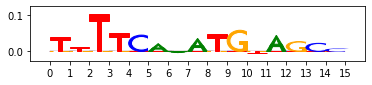

chr12 69506584 69506614


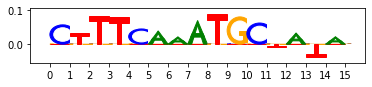

chr1 206046048 206046078


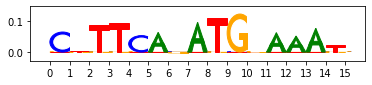

In [460]:
for i in range(10):
#     x = hdf5_results['metacluster_idx_to_submetacluster_results']['metacluster_0']['seqlets'][i]
    x = pat['seqlets_and_alnmts']['seqlets'][i]
    idx = int(x.decode('utf8').split(',')[0].split(':')[1])
    start = int(x.decode('utf8').split(',')[1].split(':')[1])
    rc = eval(x.decode('utf8').split(',')[3].split(':')[1])
    
    reg = scores_regions[intersecting_idx[idx]]
    print(reg[0], reg[1]+start, reg[1]+start+30)
    
    if rc:
        viz_sequence.plot_weights(revcomp(proj_shap_scores_seq[idx][start+(30-FWD_END):start+(30-FWD_START)]), figsize=(6,1))
    else:
        viz_sequence.plot_weights(proj_shap_scores_seq[idx][start+FWD_START:start+FWD_END], figsize=(6,1))

### computing log-odds scores

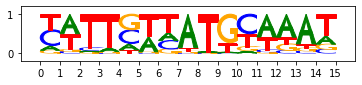

In [461]:
viz_sequence.plot_weights(np.array(pat["sequence"]["fwd"])[FWD_START:FWD_END], figsize=(6,1))

In [462]:
Counter(seqlet_to_peak_idxs)

Counter({8: 1754, 11: 2079, 10: 2651, 13: 807})

In [463]:
from random import sample

In [593]:
# make PWM -> logodds matrix with equal number of seqlets from each peak idx
logodds = []

least_num = min(Counter(seqlet_to_peak_idxs).values())

peak_set_to_seqlet_idx = {x:[] for x in PEAK_SET_SELECT}
for i,x in enumerate(seqlet_to_peak_idxs):
    peak_set_to_seqlet_idx[x].append(i)

selected_seqlets_idxs = []
for x in peak_set_to_seqlet_idx:
    selected_seqlets_idxs += sample(peak_set_to_seqlet_idx[x], least_num)

print(len(set(selected_seqlets_idxs)))

equal_peak_set_pwm = np.ones((FWD_END-FWD_START,4))

for i in selected_seqlets_idxs:
    x = pat['seqlets_and_alnmts']['seqlets'][i]
    idx = int(x.decode('utf8').split(',')[0].split(':')[1])
    start = int(x.decode('utf8').split(',')[1].split(':')[1])
    rc = eval(x.decode('utf8').split(',')[3].split(':')[1])
    
    if rc:
        equal_peak_set_pwm += revcomp(one_hot_seqs[idx][start+(30-FWD_END):start+(30-FWD_START)])
    else:
        equal_peak_set_pwm += one_hot_seqs[idx][start+FWD_START:start+FWD_END]
        
equal_peak_set_pwm = equal_peak_set_pwm/np.sum(equal_peak_set_pwm, axis=1, keepdims=True)

3228


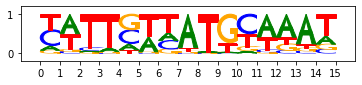

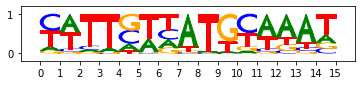

In [583]:
viz_sequence.plot_weights(np.array(pat["sequence"]["fwd"])[FWD_START:FWD_END], figsize=(6,1))
viz_sequence.plot_weights(equal_peak_set_pwm, figsize=(6,1))

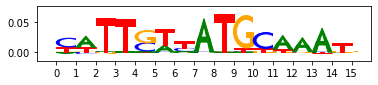

In [587]:
viz_sequence.plot_weights(np.array(pat["task0_contrib_scores"]["fwd"])[FWD_START:FWD_END], figsize=(6,1))

In [562]:
# ipsc_res = h5py.File("/users/surag/modisco_results_allChroms_counts.hdf5","r")
# ipsc_pat = ipsc_res['metacluster_idx_to_submetacluster_results']['metacluster_0']['seqlets_to_patterns_result']['patterns']["pattern_1"]
# ["sequence"]["rev"]
# logodds_mat = np.log((ipsc_pat["sequence"]["rev"][7:22]+1e-4)/.25)
# logodds_mat = ipsc_pat["task0_contrib_scores"]["rev"][7:22]

In [563]:
# originam PWM
# logodds_mat = np.log((pat["sequence"]["fwd"][FWD_START:FWD_END]+1e-4)/0.25)

# balanced peak set PWM
logodds_mat = np.log((equal_peak_set_pwm)/0.25)

# or contrib/hypothetical contrib scores
# logodds_mat = pat["task0_contrib_scores"]["fwd"][FWD_START:FWD_END]
# logodds_mat = pat["task0_hypothetical_contribs"]["fwd"][FWD_START:FWD_END]
        

# alternately consensus matrix to count number of matches (not a logodds matrix)
# logodds_mat = np.zeros(equal_peak_set_pwm.shape)
# logodds_mat[np.arange(logodds_mat.shape[0]), np.argmax(equal_peak_set_pwm, axis=1)] = 1

In [564]:
logodds = []

for x in pat['seqlets_and_alnmts']['seqlets']:
    idx = int(x.decode('utf8').split(',')[0].split(':')[1])
    start = int(x.decode('utf8').split(',')[1].split(':')[1])
    rc = eval(x.decode('utf8').split(',')[3].split(':')[1])
        
    if rc:
        logodds.append(np.sum(revcomp(onehot_data[idx][start+(30-FWD_END):start+(30-FWD_START)]) * logodds_mat))
    else:
        logodds.append(np.sum(onehot_data[idx][start+FWD_START:start+FWD_END] * logodds_mat))

In [565]:
import pandas as pd

<AxesSubplot:>

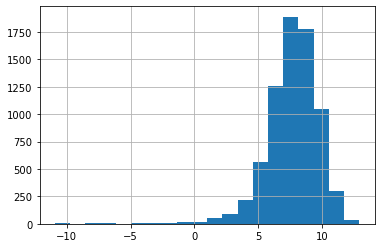

In [566]:
pd.Series(logodds).hist(bins=20)

In [567]:
logodds_p8 = [logodds[i] for i,x in enumerate(seqlet_to_peak_idxs) if x==8 and logodds[i]>0]
np.median(logodds_p8), np.mean(logodds_p8)

(7.429978320189561, 7.24540882685799)

In [568]:
logodds_p10 = [logodds[i] for i,x in enumerate(seqlet_to_peak_idxs) if x==10 and logodds[i]>0]
np.median(logodds_p10), np.mean(logodds_p10)

(7.875250699075368, 7.676258720329382)

In [569]:
logodds_p11 = [logodds[i] for i,x in enumerate(seqlet_to_peak_idxs) if x==11 and logodds[i]>0]
np.median(logodds_p11), np.mean(logodds_p11)

(8.115513282394105, 8.012563709253795)

In [570]:
logodds_p13 = [logodds[i] for i,x in enumerate(seqlet_to_peak_idxs) if x==13 and logodds[i]>0]
np.median(logodds_p13), np.mean(logodds_p13)

(8.658516762029603, 8.486812897458002)

In [555]:
import seaborn as sns

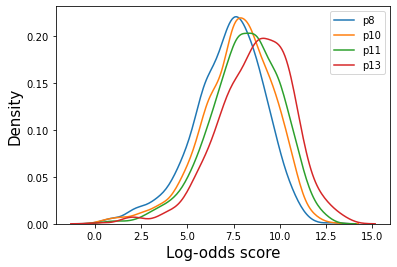

In [556]:
sns.kdeplot(logodds_p8, label='p8')
sns.kdeplot(logodds_p10, label='p10')
sns.kdeplot(logodds_p11, label='p11')
sns.kdeplot(logodds_p13, label='p13')
plt.xlabel("Log-odds score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend()
plt.savefig("tmp.pdf")
# pd.Series(logodds_p11).hist(bins=50,alpha=0.5)

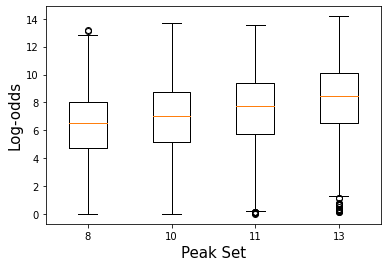

In [492]:
plt.boxplot([logodds_p8,logodds_p10,logodds_p11,logodds_p13],
            labels=[8,10,11,13])
plt.xlabel("Peak Set", fontsize=15)
plt.ylabel("Log-odds", fontsize=15)
# plt.show()
plt.savefig("tmp.pdf")

In [493]:
import scipy

In [494]:
print(scipy.stats.mannwhitneyu(logodds_p10, logodds_p8)[1])
print(scipy.stats.mannwhitneyu(logodds_p10, logodds_p11)[1])
print(scipy.stats.mannwhitneyu(logodds_p11, logodds_p8)[1])
print(scipy.stats.mannwhitneyu(logodds_p11, logodds_p13)[1])

1.6725062195865825e-11
1.0762877158669277e-13
1.4600608367729028e-37
2.676847085846333e-12


In [332]:
np.sort(logodds)[200:210]

array([0.39782962, 0.3980816 , 0.39824554, 0.39831793, 0.39864335,
       0.39932496, 0.39993432, 0.40020733, 0.40029279, 0.40055197])

chr15 96198105 96198155


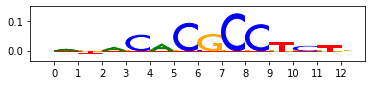

chr14 55341938 55341988


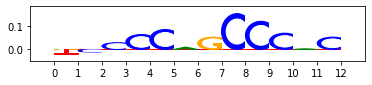

chr11 79435614 79435664


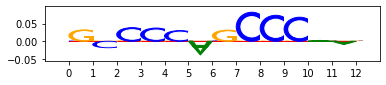

chr1 83006793 83006843


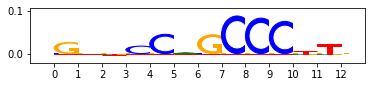

chr1 103506765 103506815


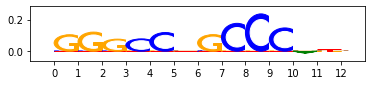

chr1 169479551 169479601


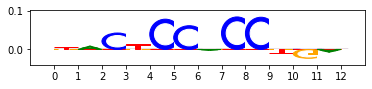

chr12 78979194 78979244


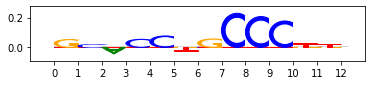

chr12 2145494 2145544


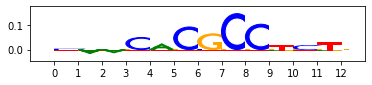

chr14 50652721 50652771


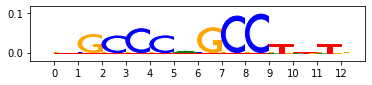

chr12 94564978 94565028


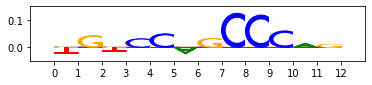

In [798]:
for i in np.argsort(logodds)[200:210]:
#     x = hdf5_results['metacluster_idx_to_submetacluster_results']['metacluster_0']['seqlets'][i]
    x = pat['seqlets_and_alnmts']['seqlets'][i]
    idx = int(x.decode('utf8').split(',')[0].split(':')[1])
    start = int(x.decode('utf8').split(',')[1].split(':')[1])
    rc = eval(x.decode('utf8').split(',')[3].split(':')[1])
    
    reg = scores_regions[intersecting_idx[idx]]
    print(reg[0], reg[1]+start, reg[1]+start+50)
    
    if rc:
        viz_sequence.plot_weights(revcomp(proj_shap_scores_seq[idx][start+(50-FWD_END):start+(50-FWD_START)]), figsize=(6,1))
    else:
        viz_sequence.plot_weights(proj_shap_scores_seq[idx][start+FWD_START:start+FWD_END], figsize=(6,1))

In [594]:
peak_wise_pwm = {x:np.ones((FWD_END-FWD_START,4)) for x in set(seqlet_to_peak_idxs)}

for i in range(len(seqlet_to_peak_idxs)):
    x = pat['seqlets_and_alnmts']['seqlets'][i]
    idx = int(x.decode('utf8').split(',')[0].split(':')[1])
    start = int(x.decode('utf8').split(',')[1].split(':')[1])
    rc = eval(x.decode('utf8').split(',')[3].split(':')[1])
    
    if rc:
        peak_wise_pwm[seqlet_to_peak_idxs[i]] += revcomp(one_hot_seqs[idx][start+(50-FWD_END):start+(50-FWD_START)])
    else:
        peak_wise_pwm[seqlet_to_peak_idxs[i]] += one_hot_seqs[idx][start+FWD_START:start+FWD_END]
        
peak_wise_pwm = {x:peak_wise_pwm[x]/np.sum(peak_wise_pwm[x],axis=1,keepdims=True) for x in peak_wise_pwm}

8


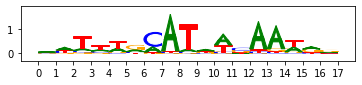

10


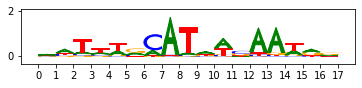

11


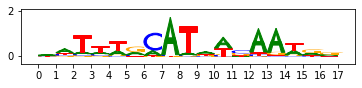

In [595]:
for x in peak_wise_pwm:
    print(x)
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(peak_wise_pwm[x]),
                                                        background=background), figsize=(6,1)) 

8


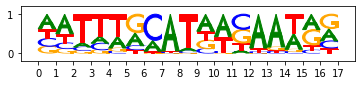

10


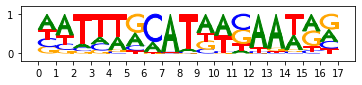

11


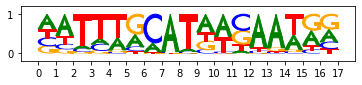

In [596]:
for x in peak_wise_pwm:
    print(x)
    viz_sequence.plot_weights(np.array(peak_wise_pwm[x]), figsize=(6,1)) 

### hit scoring

In [739]:
from modisco.tfmodisco_workflow import workflow

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
                task_names=tasks,
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=onehot_data)

loaded_tfmodisco_results =\
    workflow.TfModiscoResults.from_hdf5(hdf5_results, track_set=track_set)

Getting the exemplar motifs
Numseqles: 6162


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 500 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done 1500 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 2900 tasks      | elapsed:   23.7s
[Parallel(n_jobs=10)]: Done 4700 tasks      | elapsed:   31.3s
[Parallel(n_jobs=10)]: Done 6162 out of 6162 | elapsed:   37.5s finished


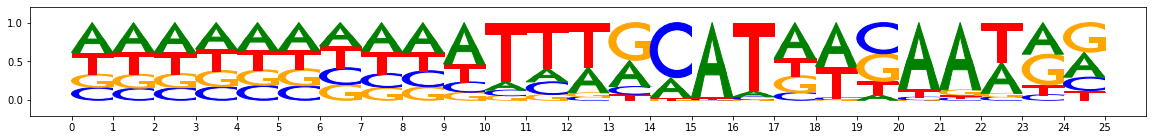

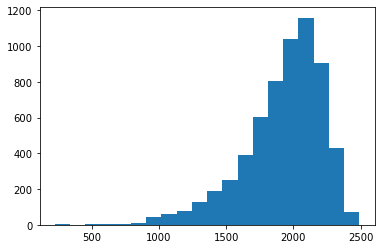

After filtering: numseqlets 6013


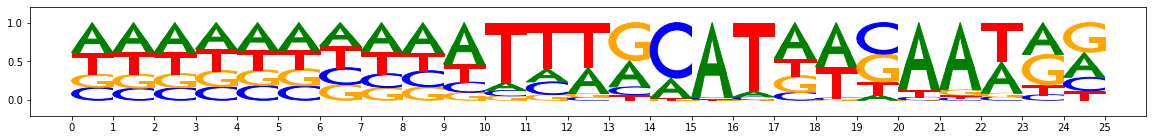

Numseqles: 3038


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 1900 tasks      | elapsed:    3.3s
[Parallel(n_jobs=10)]: Done 3038 out of 3038 | elapsed:    5.0s finished


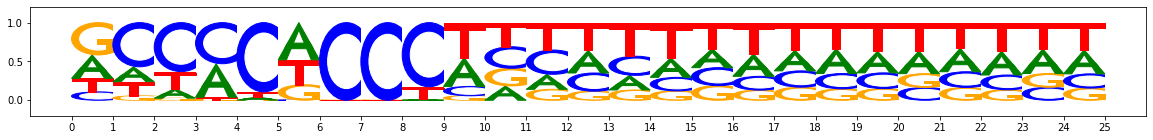

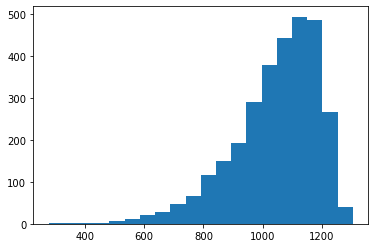

After filtering: numseqlets 2991


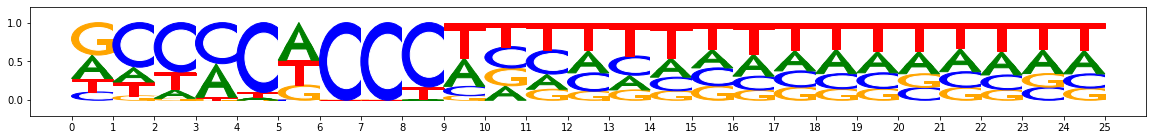

Numseqles: 755


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 700 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 755 out of 755 | elapsed:    0.7s finished


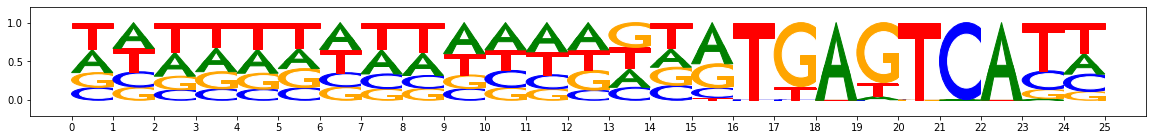

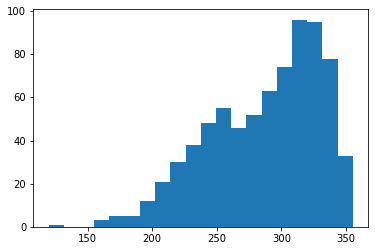

After filtering: numseqlets 747


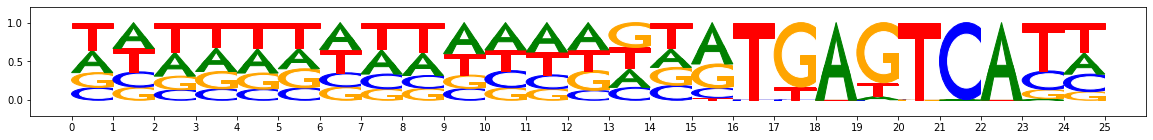

Numseqles: 507


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 507 out of 507 | elapsed:    0.5s finished


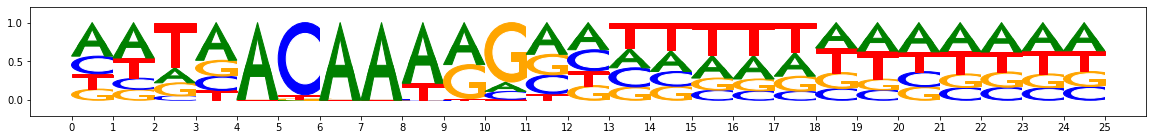

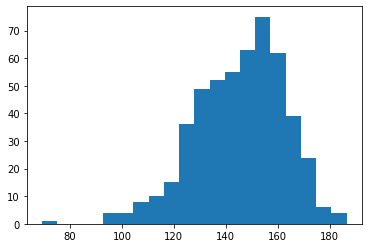

After filtering: numseqlets 506


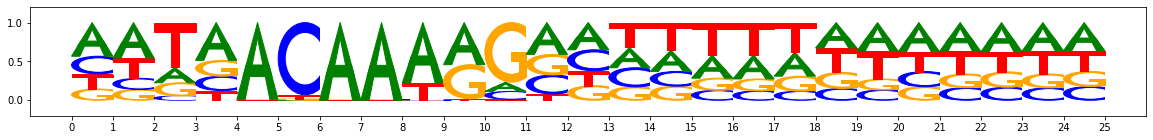

Numseqles: 267


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 267 out of 267 | elapsed:    0.4s finished


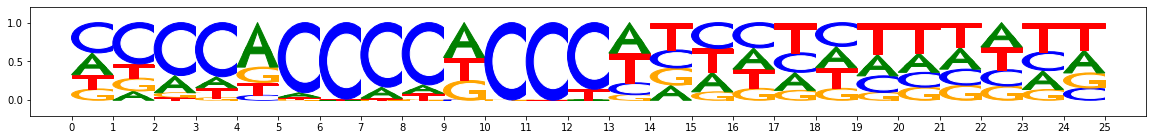

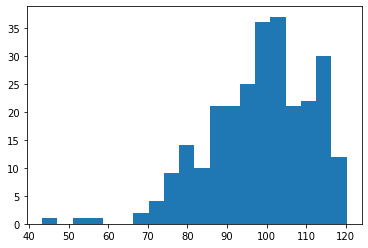

After filtering: numseqlets 264


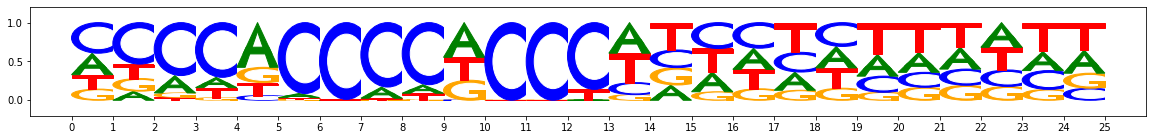

Numseqles: 167


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 167 out of 167 | elapsed:    0.2s finished


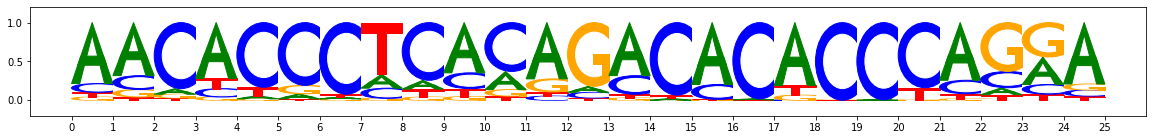

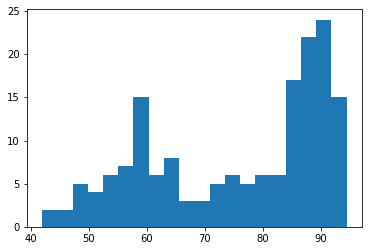

After filtering: numseqlets 158


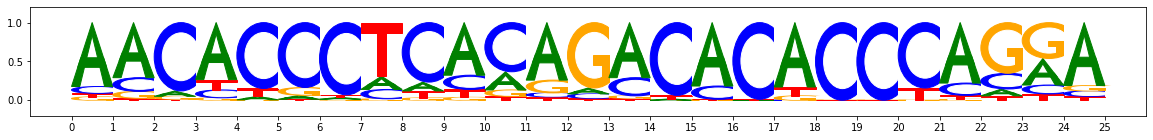

Getting labels
Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 7660 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done 39660 tasks      | elapsed:    5.6s
[Parallel(n_jobs=10)]: Done 84460 tasks      | elapsed:   11.4s
[Parallel(n_jobs=10)]: Done 176620 tasks      | elapsed:   21.8s
[Parallel(n_jobs=10)]: Done 317420 tasks      | elapsed:   37.9s
[Parallel(n_jobs=10)]: Done 320370 out of 320370 | elapsed:   38.3s finished


Took 38.660035133361816 s


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 out of   1 | elapsed:  1.0min finished


Getting impscores data
Computing fwd sims


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 7660 tasks      | elapsed:    1.5s
[Parallel(n_jobs=10)]: Done 39660 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done 84460 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 142060 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 232940 tasks      | elapsed:   28.9s
[Parallel(n_jobs=10)]: Done 320370 out of 320370 | elapsed:   39.2s finished


Took 39.57780122756958 s


In [740]:
from modisco.hit_scoring import exemplar_based_hitscoring
reload(exemplar_based_hitscoring)

SCANNING_WINDOW_WIDTH=25

instance_scorer = exemplar_based_hitscoring.prepare_instance_scorer(
    patterns=(loaded_tfmodisco_results
                .metacluster_idx_to_submetacluster_results["metacluster_0"]
                .seqlets_to_patterns_result.patterns),
    trim_window_size=SCANNING_WINDOW_WIDTH,
    task_names=tasks, bg_freq=np.array([0.27, 0.23, 0.23, 0.27]), track_set=track_set)

In [741]:
from collections import defaultdict
from modisco.hit_scoring import exemplar_based_hitscoring
reload(exemplar_based_hitscoring)

CUTOFF_VALUE = 0.8
coordinates_to_be_scanned, task0_transformed_scoretrack =\
    exemplar_based_hitscoring.get_windows_to_be_scanned(
        scanning_window_width=SCANNING_WINDOW_WIDTH,
        contrib_scores=task_to_scores["task0"],
        val_transformer=loaded_tfmodisco_results.
            multitask_seqlet_creation_results.
            task_name_to_tnt_results["task0"].val_transformer,
        cutoff_value=CUTOFF_VALUE)

computing the transformed score track


AttributeError: 'AbsPercentileValTransformer' object has no attribute 'transform_score_track'

In [751]:
x=loaded_tfmodisco_results.multitask_seqlet_creation_results.task_name_to_tnt_results["task0"].val_transformer

In [801]:
proj_shap_scores_seq[0].shape

(500, 4)

In [829]:
scores_idx8 = np.mean(np.array([np.sum(proj_shap_scores_seq[i],axis=1) for i,x in enumerate(intersecting_peak_set) if x==8]),axis=0)
scores_idx10 = np.mean(np.array([np.sum(proj_shap_scores_seq[i],axis=1) for i,x in enumerate(intersecting_peak_set) if x==10]),axis=0)
scores_idx11 = np.mean(np.array([np.sum(proj_shap_scores_seq[i],axis=1) for i,x in enumerate(intersecting_peak_set) if x==11]),axis=0)

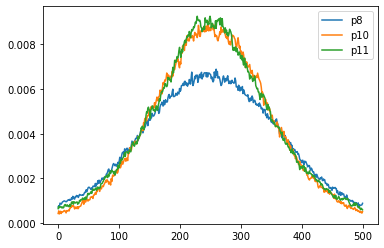

In [891]:
plt.plot(range(500), scores_idx8, label='p8')
plt.plot(range(500), scores_idx10, label='p10')
plt.plot(range(500), scores_idx11, label='p11')
plt.legend()

In [832]:
import pyBigWig

In [875]:
f = pyBigWig.open("/users/surag/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx4.bw")

In [901]:
f.close()

In [902]:
x = [scores_regions[x] for i,x in enumerate(intersecting_idx) if intersecting_peak_set[i]==11]
shuffle(x)
x[:10]

[('chr5', 132576131, 132576631),
 ('chr13', 105871313, 105871813),
 ('chr4', 106354550, 106355050),
 ('chr7', 122082555, 122083055),
 ('chr7', 131524412, 131524912),
 ('chr2', 209441151, 209441651),
 ('chr3', 153642617, 153643117),
 ('chr13', 18282143, 18282643),
 ('chr16', 54208161, 54208661),
 ('chr6', 90501569, 90502069)]

In [887]:
idx8_reads = [f.values(*scores_regions[x]) for i,x in enumerate(intersecting_idx) if intersecting_peak_set[i]==8]
idx10_reads = [f.values(*scores_regions[x]) for i,x in enumerate(intersecting_idx) if intersecting_peak_set[i]==10]
idx11_reads = [f.values(*scores_regions[x]) for i,x in enumerate(intersecting_idx) if intersecting_peak_set[i]==11]

In [888]:
idx8_mean_reads = np.nanmean(np.array(idx8_reads),axis=0)
idx10_mean_reads = np.nanmean(np.array(idx10_reads),axis=0)
idx11_mean_reads = np.nanmean(np.array(idx11_reads),axis=0)

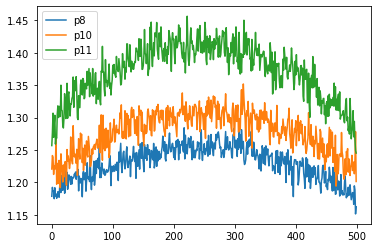

In [890]:
plt.plot(range(500), idx8_mean_reads, label='p8')
plt.plot(range(500), idx10_mean_reads, label='p10')
plt.plot(range(500), idx11_mean_reads, label='p11')
plt.legend()

In [899]:
np.max(scores_idx11/idx11_mean_reads)/np.max(scores_idx8/idx8_mean_reads)

1.1777866504466525

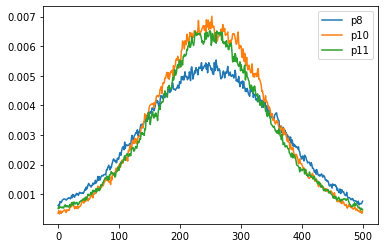

In [892]:
plt.plot(range(500), scores_idx8/idx8_mean_reads, label='p8')
plt.plot(range(500), scores_idx10/idx10_mean_reads, label='p10')
plt.plot(range(500), scores_idx11/idx11_mean_reads, label='p11')
plt.legend()